# COVID-19 World data analysis

Our World in Data: 
Complied data from European Centre for Disease Prevention and Control (ECDC), WHO, Johns Hopkins. 
Data from 187 countries.

In [1]:
# Dependencies and Setup
import os

import pandas as pd
import numpy as np
from pathlib import Path
import plotly as py
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import plotly.graph_objects as go
import plotly.io as pio


In [3]:
# Read the COVID-19 data 

COVID_df = pd.read_csv('/Users/Apple/Desktop/COVID_19_Meenakshi/owid-covid-data.csv')


In [4]:
#Calculate death rate 

COVID_df['death_rate'] = (COVID_df['new_deaths_smoothed_per_million'] / COVID_df['new_cases_smoothed_per_million']).replace(np.inf,np.nan)



In [5]:

COVID_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,death_rate
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395898,ZWE,Africa,Zimbabwe,2024-04-17,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,NaN
395899,ZWE,Africa,Zimbabwe,2024-04-18,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,NaN
395900,ZWE,Africa,Zimbabwe,2024-04-19,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,NaN
395901,ZWE,Africa,Zimbabwe,2024-04-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,NaN


## Filter data 

1. Filter data based on various comorbidity factor and socioeconomic factor and create a DataFrame.
2. Filter data from March 2020 to September 2020, which was peak reporting time for COVID-19 pandemic

In [6]:
# Create a new DataFrame with selected columns

Column_to_keep = ["date", "location", "continent", "new_cases_smoothed", "new_deaths_smoothed", "death_rate", "people_fully_vaccinated", "handwashing_facilities", "hospital_beds_per_thousand", "gdp_per_capita",  "cardiovasc_death_rate", "diabetes_prevalence", "median_age", "aged_65_older", "aged_70_older", "female_smokers", "male_smokers",  "life_expectancy", "human_development_index"]
New_Reduced_df = COVID_df[Column_to_keep]

# Convert 'date' column to datetime format
New_Reduced_df['date'] = pd.to_datetime(New_Reduced_df['date'])
New_Reduced_df


/var/folders/_n/lvm0vpcj1rx073qxcpg_05g40000gn/T/ipykernel_9669/156687726.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Reduced_df['date'] = pd.to_datetime(New_Reduced_df['date'])


,date,location,continent,new_cases_smoothed,new_deaths_smoothed,death_rate,people_fully_vaccinated,handwashing_facilities,hospital_beds_per_thousand,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,life_expectancy,human_development_index
0,2020-01-05,Afghanistan,Asia,NaN,NaN,NaN,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
1,2020-01-06,Afghanistan,Asia,NaN,NaN,NaN,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
2,2020-01-07,Afghanistan,Asia,NaN,NaN,NaN,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
3,2020-01-08,Afghanistan,Asia,NaN,NaN,NaN,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
4,2020-01-09,Afghanistan,Asia,NaN,NaN,NaN,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395898,2024-04-17,Zimbabwe,Africa,0.0,0.0,NaN,NaN,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395899,2024-04-18,Zimbabwe,Africa,0.0,0.0,NaN,NaN,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395900,2024-04-19,Zimbabwe,Africa,0.0,0.0,NaN,NaN,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395901,2024-04-20,Zimbabwe,Africa,0.0,0.0,NaN,NaN,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571


In [163]:
# Function to create traces for each continent
def create_trace(continent, color):
    filtered_Newdeath_df = New_Reduced_df[New_Reduced_df['continent'] == continent].groupby(['date'])['new_deaths_smoothed'].sum().reset_index()
    return go.Scatter(
        x = filtered_Newdeath_df['date'],
        y = filtered_Newdeath_df['new_deaths_smoothed'],
        mode = "lines",
        name = continent,
        marker = dict(color = color)
    )

# Create traces for each continent
trace1 = create_trace('Asia', 'green')
trace2 = create_trace('Europe', 'red')
trace3 = create_trace('Africa', 'black')
trace4 = create_trace('North America', 'blue')
trace5 = create_trace('South America', 'Brown')

# Create the figure and add the traces
fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)                      

# Customize layout
fig.update_layout(
    title='New Deaths Over Time by Continent',
    xaxis_title='Date',
    yaxis_title='New Deaths',
    template='plotly_white'
)

fig.write_image("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Trace_vs_New_Death.png")

# Show the plot
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.1

In [13]:
summary_statistics_table = New_Reduced_df.groupby("continent").agg({"new_deaths_smoothed":["mean", "median", "var", "std","sem"]})
summary_statistics_table

new_deaths_smoothed                                           
                             mean median           var         std       sem
continent                                                                   
Africa                   2.906514  0.000    347.453748   18.640111  0.062431
Asia                    22.270024  0.143  21210.970568  145.639866  0.537182
Europe                  26.617994  1.429   8599.459009   92.733268  0.330150
North America           25.944064  0.000  30877.096240  175.718799  0.693939
Oceania                  0.868511  0.000     36.281003    6.023371  0.031090
South America           62.001339  1.000  49283.137981  221.998059  1.500295

In [132]:
# Filter the DataFrame for the date range from March 2020 to September 2020 (first peak)
start_date = '2020-03-01'
end_date = '2022-05-30'
filtered_COVID_df = New_Reduced_df[(New_Reduced_df['date'] >= start_date) & (New_Reduced_df['date'] <= end_date)]

# # Display the filtered DataFrame

filtered_COVID_df

,date,location,continent,new_cases_smoothed,new_deaths_smoothed,death_rate,people_fully_vaccinated,handwashing_facilities,hospital_beds_per_thousand,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,life_expectancy,human_development_index
56,2020-03-01,Afghanistan,Asia,0.143,0.000,0.000000,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
57,2020-03-02,Afghanistan,Asia,0.143,0.000,0.000000,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
58,2020-03-03,Afghanistan,Asia,0.143,0.000,0.000000,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
59,2020-03-04,Afghanistan,Asia,0.143,0.000,0.000000,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
60,2020-03-05,Afghanistan,Asia,0.143,0.000,0.000000,NaN,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,NaN,NaN,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395206,2022-05-26,Zimbabwe,Africa,205.143,1.714,0.008353,4493290.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395207,2022-05-27,Zimbabwe,Africa,205.143,1.714,0.008353,4502368.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395208,2022-05-28,Zimbabwe,Africa,205.143,1.714,0.008353,4504733.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395209,2022-05-29,Zimbabwe,Africa,207.143,0.857,0.004176,NaN,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571


In [133]:
#replace Nan with "0"

filtered_df = filtered_COVID_df.fillna(0)
#filtered_df 


filtered_df 

,date,location,continent,new_cases_smoothed,new_deaths_smoothed,death_rate,people_fully_vaccinated,handwashing_facilities,hospital_beds_per_thousand,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,life_expectancy,human_development_index
56,2020-03-01,Afghanistan,Asia,0.143,0.000,0.000000,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
57,2020-03-02,Afghanistan,Asia,0.143,0.000,0.000000,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
58,2020-03-03,Afghanistan,Asia,0.143,0.000,0.000000,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
59,2020-03-04,Afghanistan,Asia,0.143,0.000,0.000000,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
60,2020-03-05,Afghanistan,Asia,0.143,0.000,0.000000,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395206,2022-05-26,Zimbabwe,Africa,205.143,1.714,0.008353,4493290.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395207,2022-05-27,Zimbabwe,Africa,205.143,1.714,0.008353,4502368.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395208,2022-05-28,Zimbabwe,Africa,205.143,1.714,0.008353,4504733.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395209,2022-05-29,Zimbabwe,Africa,207.143,0.857,0.004176,0.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571


### Create Box PLot for individual morbidity factor continent-wise
    Cardiovasc_death_rate vs Continents
    diabetes_prevalence vs Continents
    median_age vs Continents

<Figure size 1000x600 with 0 Axes>

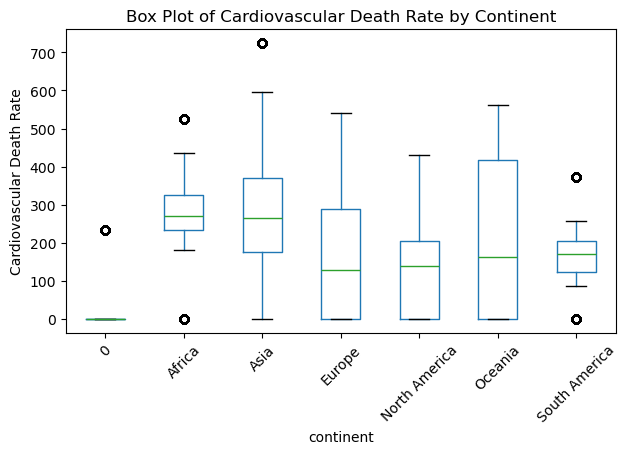

In [134]:
# Cardivascular death rate continent wise

plt.figure(figsize=(10, 6))
box_plot = filtered_df.boxplot(column='cardiovasc_death_rate', by='continent', grid=False)

# Customize the plot
plt.title('Box Plot of Cardiovascular Death Rate by Continent')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('continent')
plt.ylabel('Cardiovascular Death Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/BoxPlot_CVDR.png")


<Figure size 1000x600 with 0 Axes>

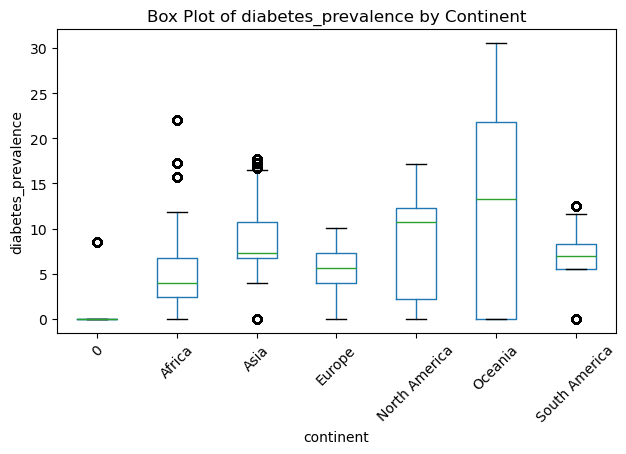

In [135]:
# Diabetes_prevalence continent wise

plt.figure(figsize=(10, 6))
box_plot = filtered_df.boxplot(column='diabetes_prevalence', by='continent', grid=False)

# Customize the plot
plt.title('Box Plot of diabetes_prevalence by Continent')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('continent')
plt.ylabel('diabetes_prevalence')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/BoxPlot_diabetes.png")

<Figure size 1000x600 with 0 Axes>

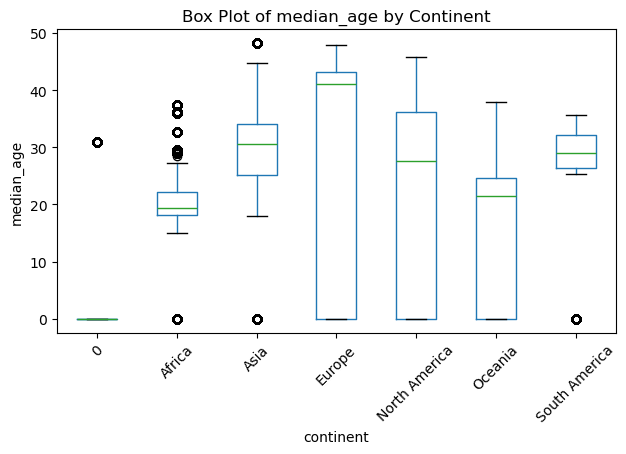

In [136]:
# Median age continent wise


plt.figure(figsize=(10, 6))
box_plot = filtered_df.boxplot(column='median_age', by='continent', grid=False)

# Customize the plot
plt.title('Box Plot of median_age by Continent')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('continent')
plt.ylabel('median_age')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/BoxPlot_Ages.png")

<Figure size 1000x600 with 0 Axes>

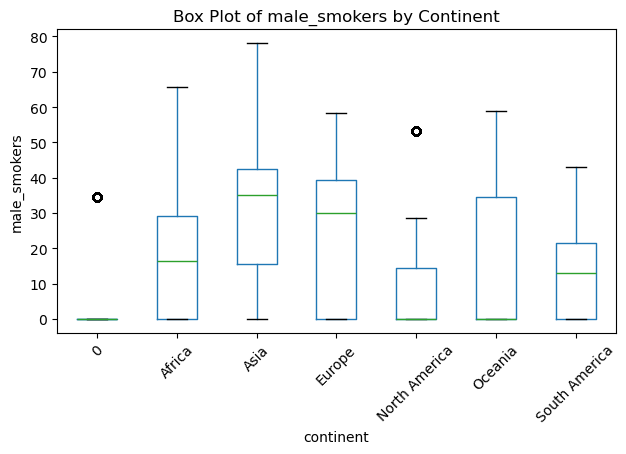

In [162]:
# Male_smokers continent wise


plt.figure(figsize=(10, 6))
box_plot = filtered_df.boxplot(column='male_smokers', by='continent', grid=False)

# Customize the plot
plt.title('Box Plot of male_smokers by Continent')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('continent')
plt.ylabel('male_smokers')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/BoxPlot_male_smokers.png")

<Figure size 1000x600 with 0 Axes>

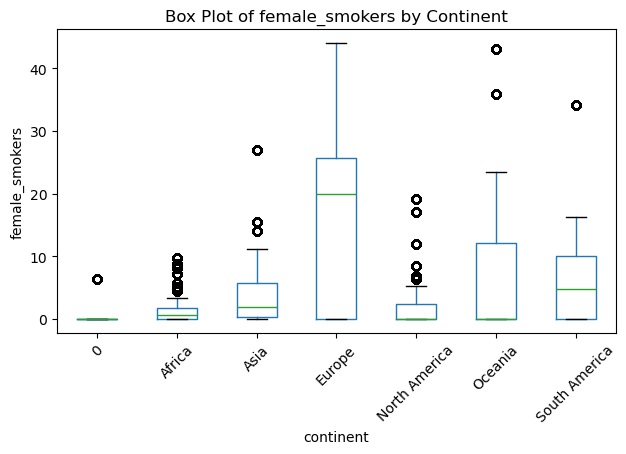

In [161]:
# Female_smokers continent wise


plt.figure(figsize=(10, 6))
box_plot = filtered_df.boxplot(column='female_smokers', by='continent', grid=False)

# Customize the plot
plt.title('Box Plot of female_smokers by Continent')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('continent')
plt.ylabel('female_smokers')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/BoxPlot_female_smokers.png")

In [137]:
# Reduced Data Frame based on comorbidity and Socioecomomic factors

Reduced_column= ["continent", "death_rate","new_cases_smoothed", "people_fully_vaccinated", "handwashing_facilities", "hospital_beds_per_thousand", "gdp_per_capita",  "cardiovasc_death_rate", "diabetes_prevalence", "median_age", "aged_65_older", "aged_70_older","female_smokers", "male_smokers",  "life_expectancy", "human_development_index"]
Reduced_df= filtered_df[Reduced_column]
Reduced_df

,continent,death_rate,new_cases_smoothed,people_fully_vaccinated,handwashing_facilities,hospital_beds_per_thousand,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,life_expectancy,human_development_index
56,Asia,0.000000,0.143,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
57,Asia,0.000000,0.143,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
58,Asia,0.000000,0.143,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
59,Asia,0.000000,0.143,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
60,Asia,0.000000,0.143,0.0,37.746,0.5,1803.987,597.029,9.59,18.6,2.581,1.337,0.0,0.0,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395206,Africa,0.008353,205.143,4493290.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395207,Africa,0.008353,205.143,4502368.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395208,Africa,0.008353,205.143,4504733.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571
395209,Africa,0.004176,207.143,0.0,36.791,1.7,1899.775,307.846,1.82,19.6,2.822,1.882,1.6,30.7,61.49,0.571


## Create DataFrame based on comorbidity and Socioecomomic factors for Asia, North America and Europe

In [138]:
# Filter DataFrame on the basis of continents

Reduced_df['continent'] = pd.DataFrame(Reduced_df['continent'])


# Filter the DataFrame for the date range
Asia_df = Reduced_df[Reduced_df['continent'] == 'Asia']
Europe_df = Reduced_df[Reduced_df['continent'] == 'Europe']
North_America_df = Reduced_df[Reduced_df['continent'] == 'North America']

# Print the filtered DataFrame
Asia_df
Europe_df
North_America_df


/var/folders/_n/lvm0vpcj1rx073qxcpg_05g40000gn/T/ipykernel_9669/3405749083.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,continent,death_rate,new_cases_smoothed,people_fully_vaccinated,handwashing_facilities,hospital_beds_per_thousand,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,life_expectancy,human_development_index
11039,North America,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.000,0.0,0.0,81.88,0.0
11040,North America,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.000,0.0,0.0,81.88,0.0
11041,North America,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.000,0.0,0.0,81.88,0.0
11042,North America,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.000,0.0,0.0,81.88,0.0
11043,North America,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.000,0.0,0.0,81.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375145,North America,0.0,116.714,0.0,0.0,0.0,0.0,273.67,12.26,42.2,18.601,10.799,0.0,0.0,80.58,0.0
375146,North America,0.0,116.714,0.0,0.0,0.0,0.0,273.67,12.26,42.2,18.601,10.799,0.0,0.0,80.58,0.0
375147,North America,0.0,116.714,0.0,0.0,0.0,0.0,273.67,12.26,42.2,18.601,10.799,0.0,0.0,80.58,0.0
375148,North America,0.0,96.857,0.0,0.0,0.0,0.0,273.67,12.26,42.2,18.601,10.799,0.0,0.0,80.58,0.0


### Create Statistics table for each continent: Asia, North America and Europe

In [139]:
#Create Stats table for Asia_df
Asia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
death_rate,41208.0,1.831638e-02,5.955505e-02,0.0,0.000,0.005152,0.017629,2.000000e+00
new_cases_smoothed,41208.0,3.661603e+03,1.874557e+04,0.0,5.571,191.000000,1448.143000,3.912796e+05
people_fully_vaccinated,41208.0,9.436614e+06,6.464792e+07,0.0,0.000,0.000000,211675.250000,1.255732e+09
handwashing_facilities,41208.0,3.744235e+01,3.911106e+01,0.0,0.000,28.178000,78.463000,1.000000e+02
hospital_beds_per_thousand,41208.0,2.899440e+00,3.115535e+00,0.0,0.900,1.900000,4.000000,1.320000e+01
gdp_per_capita,41208.0,2.210541e+04,2.628772e+04,0.0,5034.708,11669.077000,33132.320000,1.169356e+05
cardiovasc_death_rate,41208.0,2.831437e+02,1.544615e+02,0.0,176.690,265.910000,370.437000,7.244170e+02
diabetes_prevalence,41208.0,8.585355e+00,4.213530e+00,0.0,6.740,7.260000,10.680000,1.772000e+01
median_age,41208.0,3.022517e+01,7.646599e+00,0.0,25.200,30.600000,34.000000,4.820000e+01
aged_65_older,41208.0,6.291238e+00,4.821913e+00,0.0,3.295,4.803000,8.514000,2.704900e+01


In [140]:
#Create Stats table for Europe_df

Europe_df.describe().T

,count,mean,std,min,25%,50%,75%,max
death_rate,45090.0,2.073541e-02,6.835222e-02,0.0,0.000,0.006372,0.020145,2.280607e+00
new_cases_smoothed,45090.0,4.358364e+03,1.665982e+04,0.0,13.000,289.000000,1947.857000,3.452919e+05
people_fully_vaccinated,45090.0,3.003979e+06,1.009724e+07,0.0,0.000,0.000000,446552.750000,7.368254e+07
handwashing_facilities,45090.0,5.132151e+00,2.138198e+01,0.0,0.000,0.000000,0.000000,9.771900e+01
hospital_beds_per_thousand,45090.0,4.043603e+00,2.992983e+00,0.0,2.397,3.800000,5.820000,1.380000e+01
gdp_per_capita,45090.0,2.551211e+04,2.104569e+04,0.0,5189.972,25063.846000,39753.244000,9.427796e+04
cardiovasc_death_rate,45090.0,1.718207e+02,1.472098e+02,0.0,0.000,128.275000,287.959000,5.398490e+02
diabetes_prevalence,45090.0,5.254291e+00,3.166553e+00,0.0,4.020,5.590000,7.290000,1.008000e+01
median_age,45090.0,3.064047e+01,1.884262e+01,0.0,0.000,41.000000,43.200000,4.790000e+01
aged_65_older,45090.0,1.290558e+01,8.233309e+00,0.0,0.000,16.569000,19.426000,2.302100e+01


In [141]:
#Create Stats table for North_America_df

North_America_df.describe().T

,count,mean,std,min,25%,50%,75%,max
death_rate,33661.0,1.959094e-02,7.513085e-02,0.0,0.000,0.002192,0.018969,2.000000e+00
new_cases_smoothed,33661.0,2.939195e+03,2.552017e+04,0.0,0.857,14.286000,194.286000,8.072761e+05
people_fully_vaccinated,33661.0,3.258308e+06,2.186442e+07,0.0,0.000,0.000000,0.000000,2.225777e+08
handwashing_facilities,33661.0,2.458627e+01,3.758838e+01,0.0,0.000,0.000000,66.425000,9.065000e+01
hospital_beds_per_thousand,33661.0,1.299512e+00,1.550288e+00,0.0,0.000,0.700000,2.300000,5.800000e+00
gdp_per_capita,33661.0,1.426077e+04,1.599798e+04,0.0,0.000,8193.571000,22267.037000,5.422545e+04
cardiovasc_death_rate,33661.0,1.249692e+02,1.087224e+02,0.0,0.000,139.547000,204.620000,4.305480e+02
diabetes_prevalence,33661.0,8.227073e+00,5.265019e+00,0.0,2.160,10.710000,12.260000,1.711000e+01
median_age,33661.0,2.237317e+01,1.699611e+01,0.0,0.000,27.600000,36.200000,4.570000e+01
aged_65_older,33661.0,6.064024e+00,5.911184e+00,0.0,0.000,5.445000,9.684000,1.860100e+01


###### Filter dataFrame on the basis of comorbidity parameter in Asia by selecting columns and create correlation matrix

In [142]:
#Filter dataFrame on the basis of comorbidity parameter in Asia

Reduced_Asia_Comorbidity_column= ["death_rate","new_cases_smoothed", "cardiovasc_death_rate", "diabetes_prevalence", "median_age", "aged_65_older", "aged_70_older", "female_smokers", "male_smokers"]
Reduced_Asia_Comorbidity_df= Asia_df[Reduced_Asia_Comorbidity_column]
Reduced_Asia_Comorbidity_df.head()

,death_rate,new_cases_smoothed,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
56,0.0,0.143,597.029,9.59,18.6,2.581,1.337,0.0,0.0
57,0.0,0.143,597.029,9.59,18.6,2.581,1.337,0.0,0.0
58,0.0,0.143,597.029,9.59,18.6,2.581,1.337,0.0,0.0
59,0.0,0.143,597.029,9.59,18.6,2.581,1.337,0.0,0.0
60,0.0,0.143,597.029,9.59,18.6,2.581,1.337,0.0,0.0


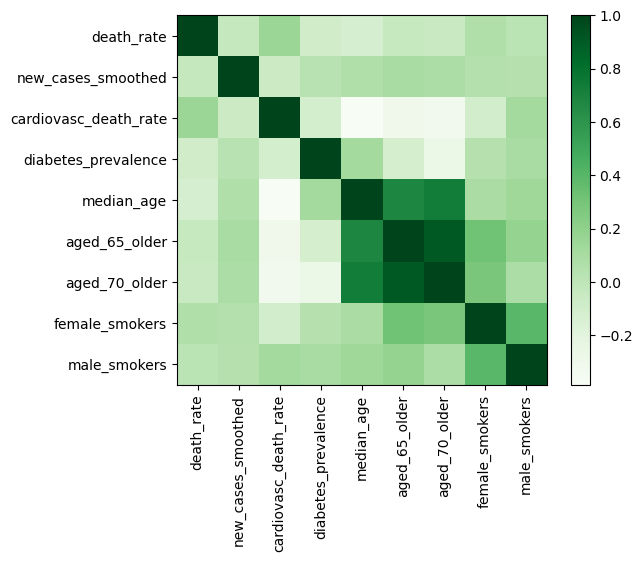

                       death_rate  new_cases_smoothed  cardiovasc_death_rate  \
death_rate               1.000000           -0.028994               0.151099   
new_cases_smoothed      -0.028994            1.000000              -0.067440   
cardiovasc_death_rate    0.151099           -0.067440               1.000000   
diabetes_prevalence     -0.092254            0.027196              -0.111314   
median_age              -0.122176            0.064960              -0.385709   
aged_65_older           -0.044230            0.099347              -0.308917   
aged_70_older           -0.047803            0.083376              -0.326403   
female_smokers           0.058172            0.049191              -0.099530   
male_smokers             0.014335            0.037189               0.116407   

                       diabetes_prevalence  median_age  aged_65_older  \
death_rate                       -0.092254   -0.122176      -0.044230   
new_cases_smoothed                0.027196    0.06496

In [143]:
# Create corelation matrix comorbidity factor in Asia

matrix = Reduced_Asia_Comorbidity_df.corr()
plt.imshow(matrix, cmap='Greens')
plt.colorbar()
variables = []
for i in matrix.columns:
  variables.append(i)
plt.xticks(range(len(matrix)), variables, rotation="vertical", ha='center')
plt.yticks(range(len(matrix)), variables)

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/AsiaMatrix.png")
plt.show()
print(matrix)

###### Filter dataFrame on the basis of comorbidity parameter in North America by selecting columns and create correlation matrix

In [144]:
#Filter dataFrame on the basis of comorbidity parameter in North America

Reduced_North_America_Comorbidity_column= ["death_rate","new_cases_smoothed", "cardiovasc_death_rate", "diabetes_prevalence", "median_age", "aged_65_older", "aged_70_older", "female_smokers", "male_smokers"]
Reduced_North_America_Comorbidity_df= North_America_df[Reduced_North_America_Comorbidity_column]
Reduced_North_America_Comorbidity_df.head()

,death_rate,new_cases_smoothed,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
11039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


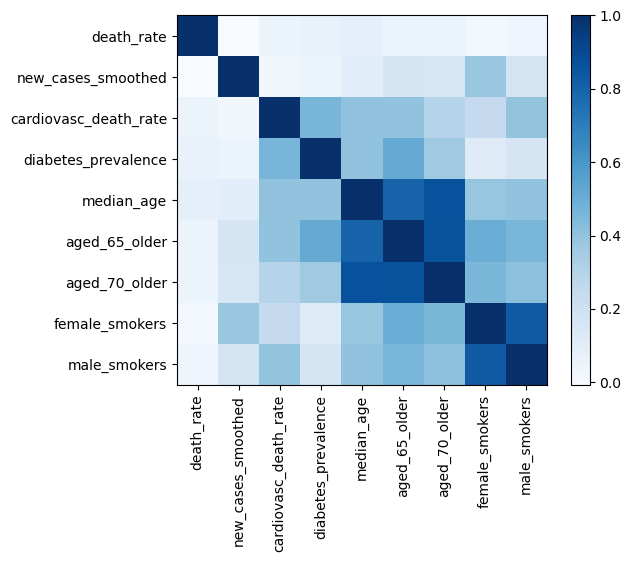

                       death_rate  new_cases_smoothed  cardiovasc_death_rate  \
death_rate               1.000000           -0.007658               0.051894   
new_cases_smoothed      -0.007658            1.000000               0.026589   
cardiovasc_death_rate    0.051894            0.026589               1.000000   
diabetes_prevalence      0.059474            0.053368               0.464439   
median_age               0.084260            0.102544               0.404246   
aged_65_older            0.052857            0.165202               0.400753   
aged_70_older            0.051400            0.151918               0.294750   
female_smokers           0.016723            0.383247               0.247695   
male_smokers             0.036841            0.168221               0.396136   

                       diabetes_prevalence  median_age  aged_65_older  \
death_rate                        0.059474    0.084260       0.052857   
new_cases_smoothed                0.053368    0.10254

In [145]:
# Create corelation matrix comorbidity factor in North_America

matrix = Reduced_North_America_Comorbidity_df.corr()
plt.imshow(matrix, cmap='Blues')
plt.colorbar()
variables = []
for i in matrix.columns:
  variables.append(i)
plt.xticks(range(len(matrix)), variables, rotation="vertical", ha='center')
plt.yticks(range(len(matrix)), variables)
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/NorthAmericaMatrix.png")
plt.show()
print(matrix)

##### Filter dataFrame on the basis of comorbidity parameter in Europe by selecting columns and create correlation matrix

In [146]:
#Filter dataFrame on the basis of comorbidity parameter in Europe

Reduced_Europe_Comorbidity_column= ["death_rate","new_cases_smoothed", "cardiovasc_death_rate", "diabetes_prevalence", "median_age", "aged_65_older", "aged_70_older", "female_smokers", "male_smokers"]
Reduced_Europe_Comorbidity_df= Europe_df[Reduced_Europe_Comorbidity_column]
Reduced_Europe_Comorbidity_df.head()

,death_rate,new_cases_smoothed,cardiovasc_death_rate,diabetes_prevalence,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
3194,0.0,0.0,304.195,10.08,38.0,13.188,8.643,7.1,51.2
3195,0.0,0.0,304.195,10.08,38.0,13.188,8.643,7.1,51.2
3196,0.0,0.0,304.195,10.08,38.0,13.188,8.643,7.1,51.2
3197,0.0,0.0,304.195,10.08,38.0,13.188,8.643,7.1,51.2
3198,0.0,0.0,304.195,10.08,38.0,13.188,8.643,7.1,51.2


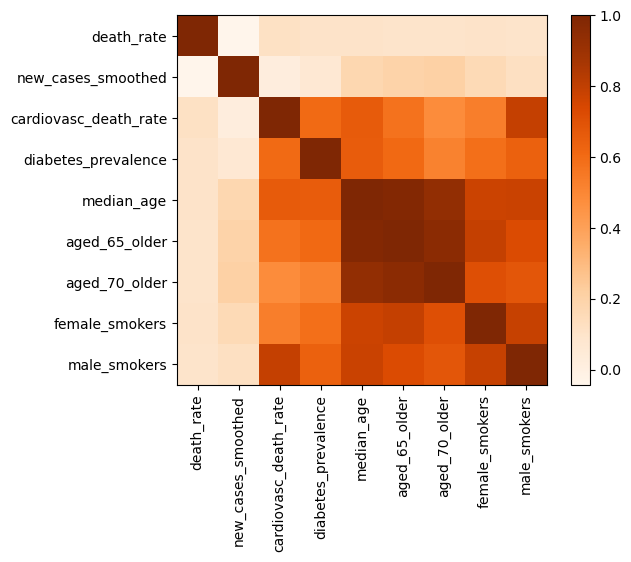

                       death_rate  new_cases_smoothed  cardiovasc_death_rate  \
death_rate               1.000000           -0.043268               0.118321   
new_cases_smoothed      -0.043268            1.000000               0.020647   
cardiovasc_death_rate    0.118321            0.020647               1.000000   
diabetes_prevalence      0.103333            0.064941               0.604496   
median_age               0.102039            0.173587               0.660269   
aged_65_older            0.097276            0.194281               0.575895   
aged_70_older            0.096104            0.208675               0.480923   
female_smokers           0.101594            0.159760               0.528487   
male_smokers             0.098759            0.122308               0.792038   

                       diabetes_prevalence  median_age  aged_65_older  \
death_rate                        0.103333    0.102039       0.097276   
new_cases_smoothed                0.064941    0.17358

<Figure size 640x480 with 0 Axes>

In [147]:
# Create corelation matrix comorbidity factor in Europe

matrix = Reduced_Europe_Comorbidity_df.corr()
plt.imshow(matrix, cmap='Oranges')
plt.colorbar()
variables = []
for i in matrix.columns:
  variables.append(i)
plt.xticks(range(len(matrix)), variables, rotation="vertical", ha='center')
plt.yticks(range(len(matrix)), variables)
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/EuropeMatrix.png")
plt.show()
plt.tight_layout()
print(matrix)

# Corelation between comorbidity factors in Asia
## Plot scatter plot to etrmine the correlation between below factors
    ### cardiovasc_death_rate vs diabetes_prevalence
    ### cardiovasc_death_rate vs Median Age
    ### cardiovasc_death_rate vs Smoking

The r-value is: -0.11131377732032868
slope:-0.003036509623870919
intercept:9.445123991750853
rvalue (Correlation coefficient):-0.11131377732032868
stderr:0.00013354821430460866
y = -0.0x + 9.45


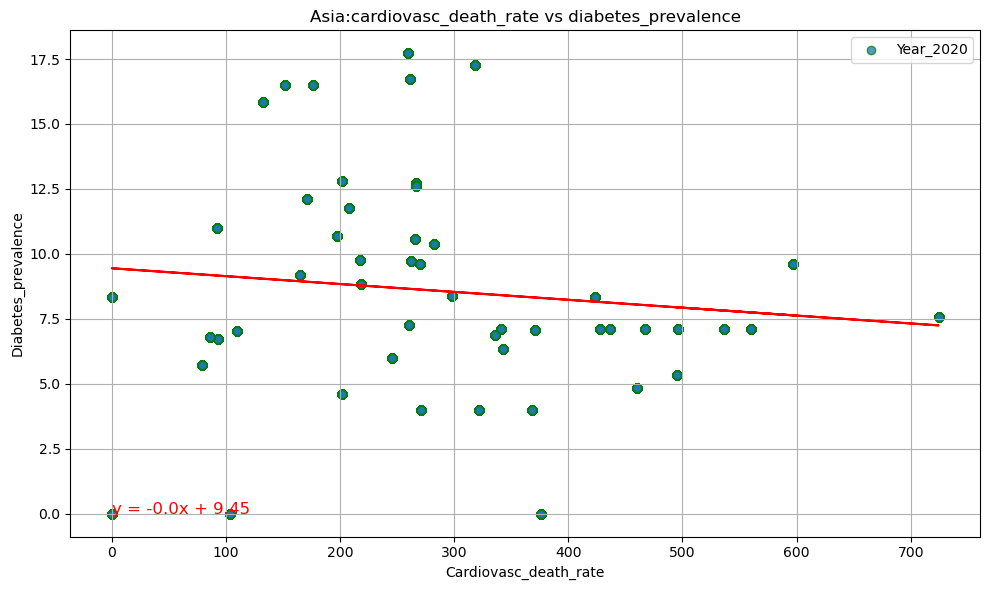

In [149]:
# Scatter plot: Asia:cardiovasc_death_rate vs diabetes_prevalence



x_values = Reduced_Asia_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Asia_Comorbidity_df['diabetes_prevalence']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="g", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Asia:cardiovasc_death_rate vs diabetes_prevalence")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Diabetes_prevalence')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Asia_cardiovasc_death_rate vs diabetes_prevalence.png")
plt.show()

The r-value is: -0.3089167561183777
slope:-0.009643628757851175
intercept:9.021770976662717
rvalue (Correlation coefficient):-0.3089167561183777
stderr:0.00014626485460717835
y = -0.01x + 9.02


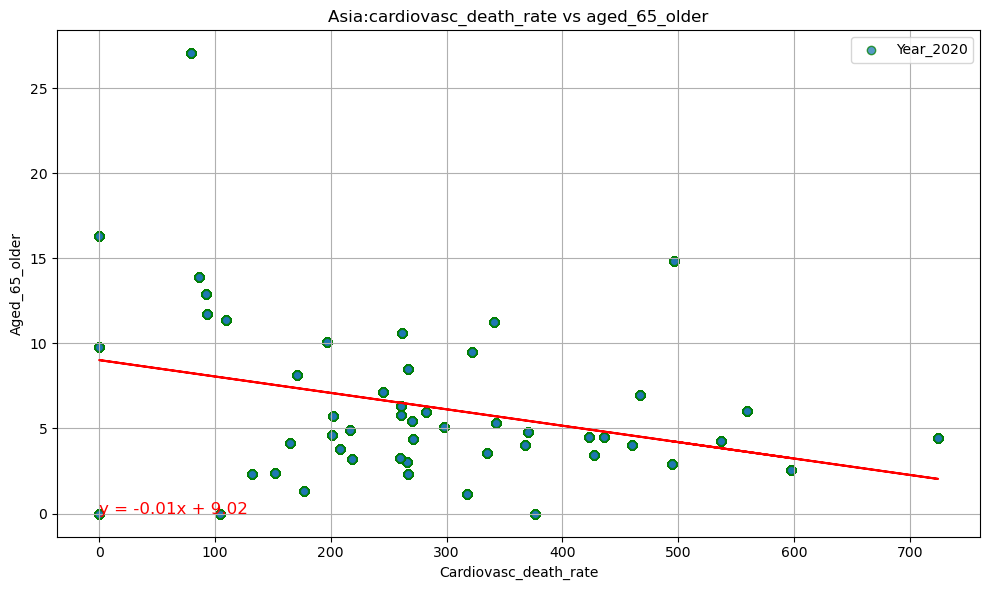

In [151]:
# Scatter plot: Asia:cardiovasc_death_rate vs aged_65_older

x_values = Reduced_Asia_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Asia_Comorbidity_df['aged_65_older']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="g", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Asia:cardiovasc_death_rate vs aged_65_older")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Aged_65_older')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Asia_cardiovasc_death_rate vs age.png")
plt.show()

The r-value is: 0.11640701851908339
slope:0.015398903596233571
intercept:25.694218670673465
rvalue (Correlation coefficient):0.11640701851908339
stderr:0.0006472436716419273
y = 0.02x + 25.69


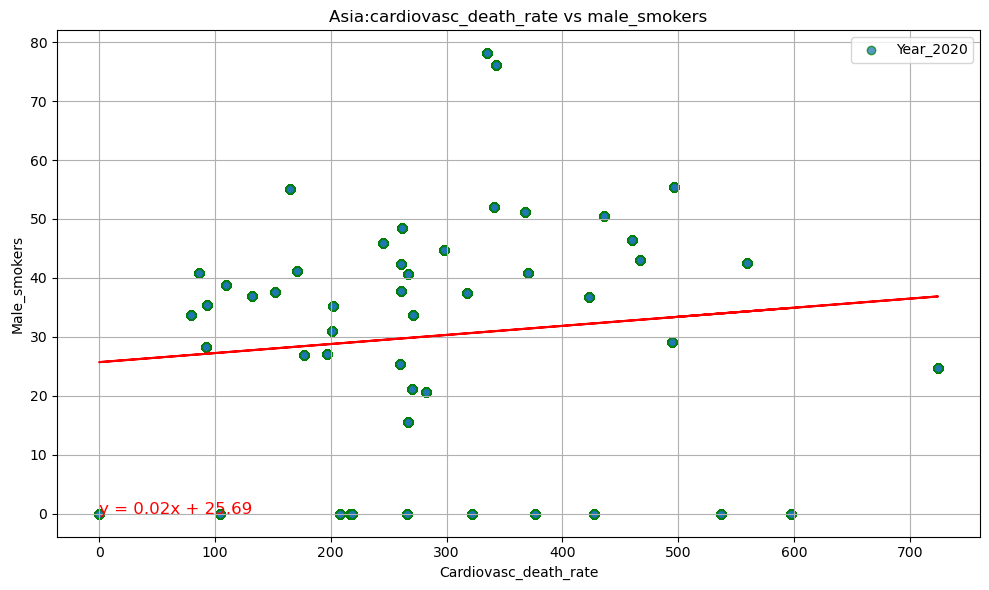

In [152]:
# Scatter plot: Asia:cardiovasc_death_rate vs male_smokers

x_values = Reduced_Asia_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Asia_Comorbidity_df['male_smokers']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="g", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Asia:cardiovasc_death_rate vs male_smokers")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Male_smokers')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Asia_cardiovasc_death_rate vs male_smokers.png")

plt.show()

The r-value is: -0.0995303655273494
slope:-0.0032043687184501817
intercept:4.545294450609759
rvalue (Correlation coefficient):-0.0995303655273494
stderr:0.00015781373746385528
y = -0.0x + 4.55


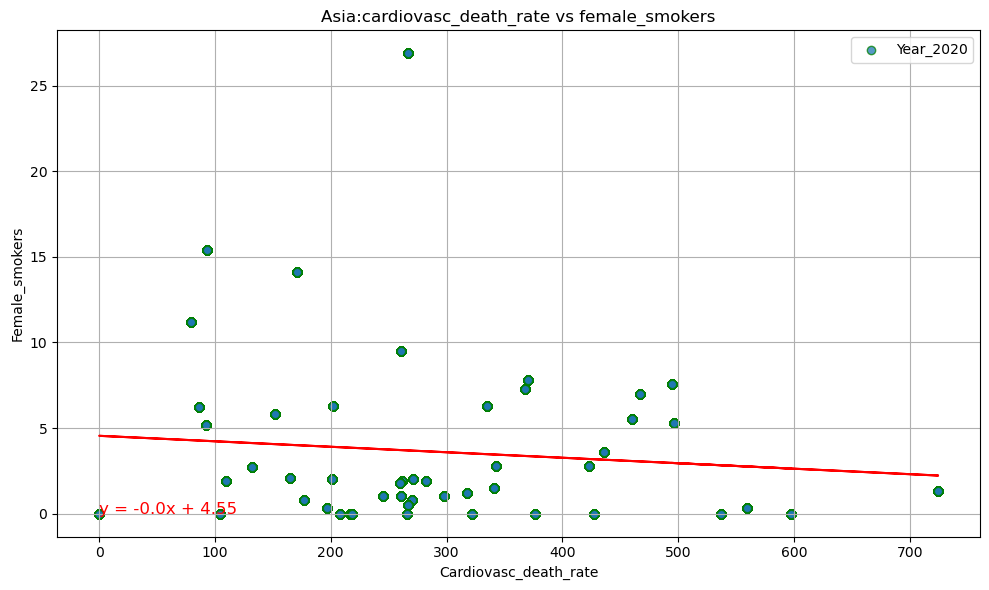

In [153]:
# Scatter plot:Asia:cardiovasc_death_rate vs female_smokers

x_values = Reduced_Asia_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Asia_Comorbidity_df['female_smokers']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="g", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Asia:cardiovasc_death_rate vs female_smokers")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Female_smokers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Asia_cardiovasc_death_rate vs Female_smokers.png")

plt.show()

# Correlation between comorbidity factors in North America

## Plot scatter plot to etrmine the correlation between below factors
    ### cardiovasc_death_rate vs diabetes_prevalence
    ### cardiovasc_death_rate vs Median Age
    ### cardiovasc_death_rate vs Smoking

The r-value is: 0.46443924353091737
slope:0.022491063912334654
intercept:5.416381919045813
rvalue (Correlation coefficient):0.46443924353091737
stderr:0.00023376018297030664
y = 0.02x + 5.42


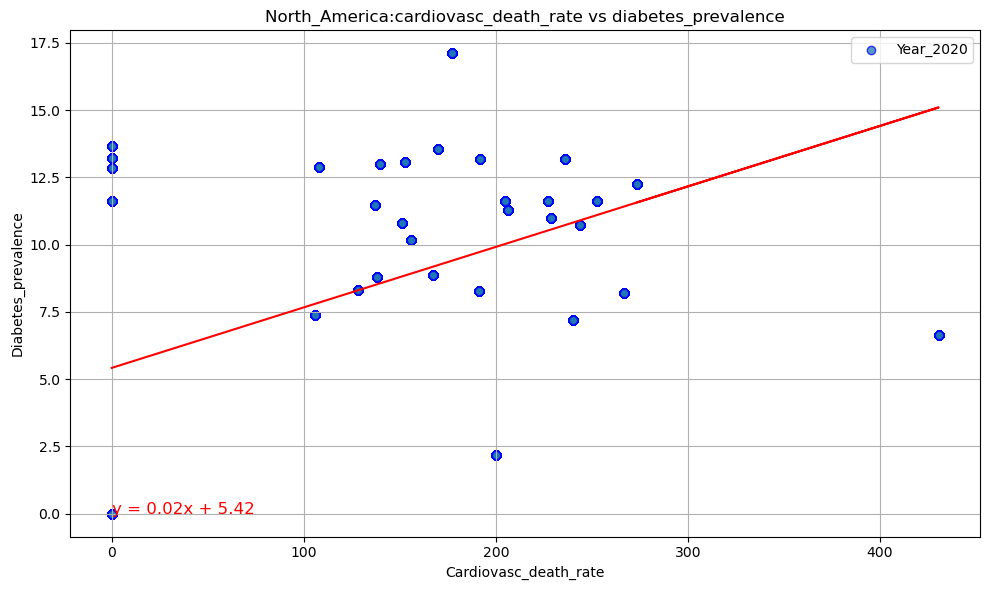

In [154]:
# Scatter plot: North_America:cardiovasc_death_rate vs diabetes_prevalence

x_values = Reduced_North_America_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_North_America_Comorbidity_df['diabetes_prevalence']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"North_America:cardiovasc_death_rate vs diabetes_prevalence")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Diabetes_prevalence')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/North_America_cardiovasc_death_rate vs diabetes_prevalence.png")

plt.show()

The r-value is: 0.4007530795127012
slope:0.021788758022868625
intercept:3.341099774552809
rvalue (Correlation coefficient):0.4007530795127012
stderr:0.0002715117952871511
y = 0.02x + 3.34


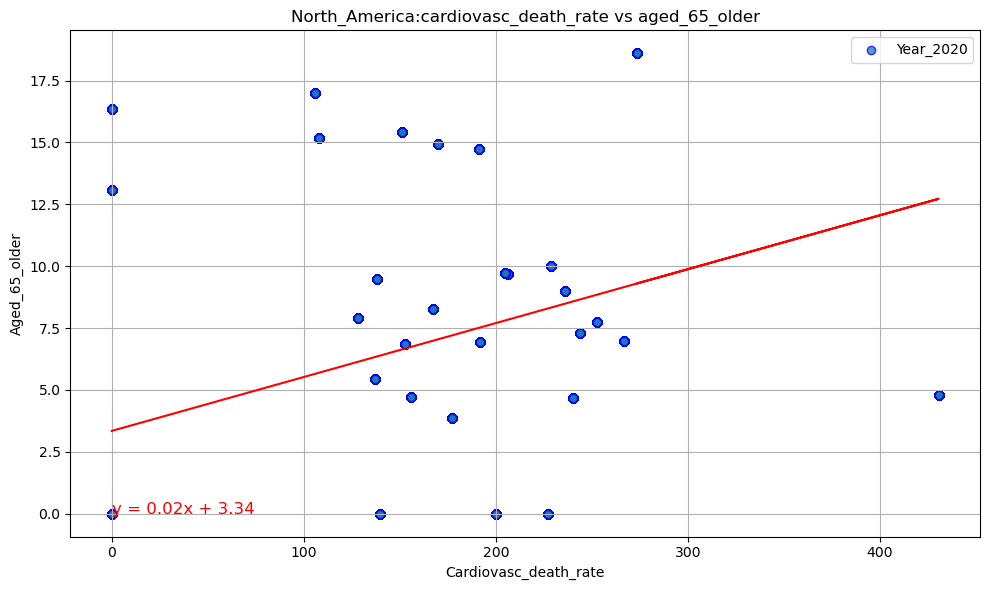

In [155]:
# Scatter plot: North_America:cardiovasc_death_rate vs aged_65_older

x_values = Reduced_North_America_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_North_America_Comorbidity_df['aged_65_older']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"North_America:cardiovasc_death_rate vs aged_65_older")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Aged_65_older')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/North_America_cardiovasc_death_rate vs age.png")

plt.show()

The r-value is: 0.3961360528315265
slope:0.04231076947456109
intercept:1.24172342251663
rvalue (Correlation coefficient):0.3961360528315265
stderr:0.001044667515887155
y = 0.04x + 1.24


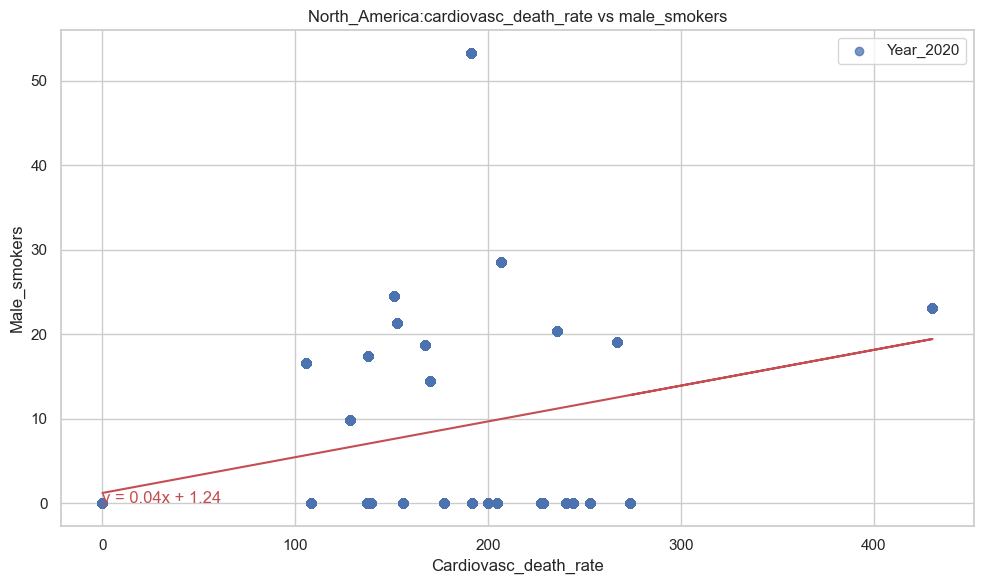

In [191]:
#Scatter Plot: North_America:cardiovasc_death_rate vs male_smokers

sns.set(style="whitegrid")

x_values = Reduced_North_America_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_North_America_Comorbidity_df['male_smokers']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"North_America:cardiovasc_death_rate vs male_smokers")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Male_smokers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19/North_America_cardiovasc_death_rate vs male_smokers.png")


plt.show()

The r-value is: 0.24769462080095678
slope:0.01024922461764424
intercept:0.9167231245564904
rvalue (Correlation coefficient):0.24769462080095678
stderr:0.00021851188644178018
y = 0.01x + 0.92


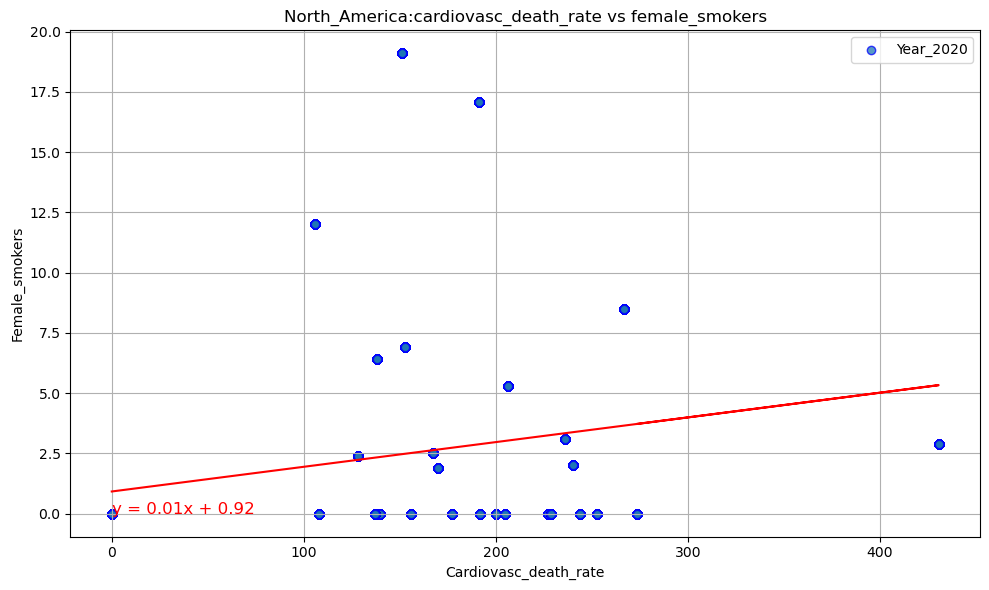

In [156]:
# Scatter Plot: North_America:cardiovasc_death_rate vs female_smokers

x_values = Reduced_North_America_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_North_America_Comorbidity_df['female_smokers']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"North_America:cardiovasc_death_rate vs female_smokers")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Female_smokers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/North_America_cardiovasc_death_rate vs female_smokers.png")
plt.show()

# Corelation between comorbidity factors in North America
    ## Plot scatter plot to etrmine the correlation between below factors
        #### cardiovasc_death_rate vs diabetes_prevalence 
        #### cardiovasc_death_rate vs Median Age
        #### cardiovasc_death_rate vs Smoking

The r-value is: 0.6044962761811806
slope:0.013003004877130719
intercept:3.0201051518910784
rvalue (Correlation coefficient):0.6044962761811806
stderr:8.069827568475774e-05
y = 0.01x + 3.02


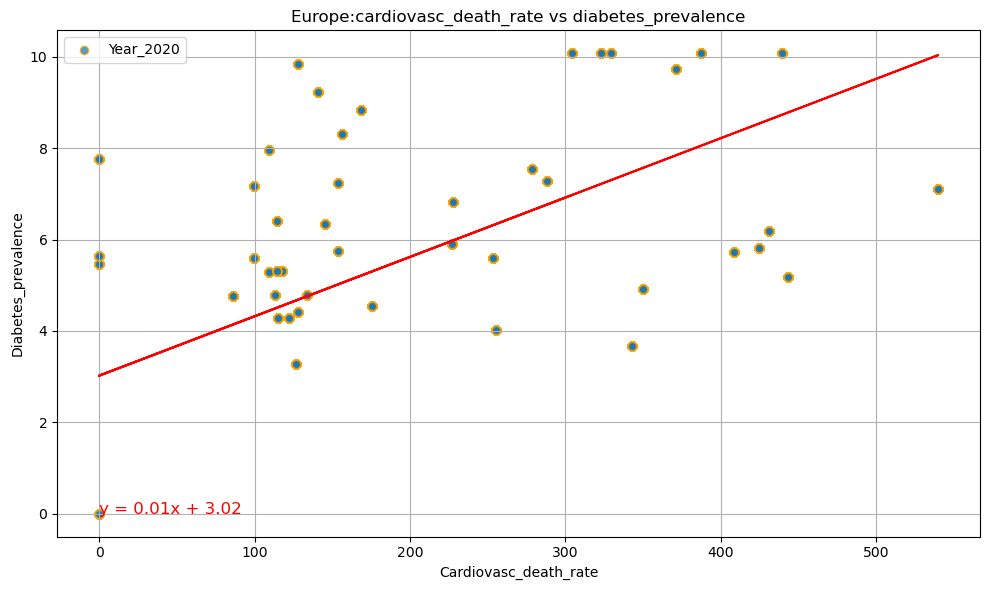

In [157]:
# Scatter Plot: Europe:cardiovasc_death_rate vs diabetes_prevalence

x_values = Reduced_Europe_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Europe_Comorbidity_df['diabetes_prevalence']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="Orange", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Europe:cardiovasc_death_rate vs diabetes_prevalence")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Diabetes_prevalence')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Europe_cardiovasc_death_rate vs diabetes_prevalence.png")

plt.show()

The r-value is: 0.7920382371719449
slope:0.09795229267904396
intercept:9.092537015351898
rvalue (Correlation coefficient):0.7920382371719449
stderr:0.0003555521854906053
y = 0.1x + 9.09


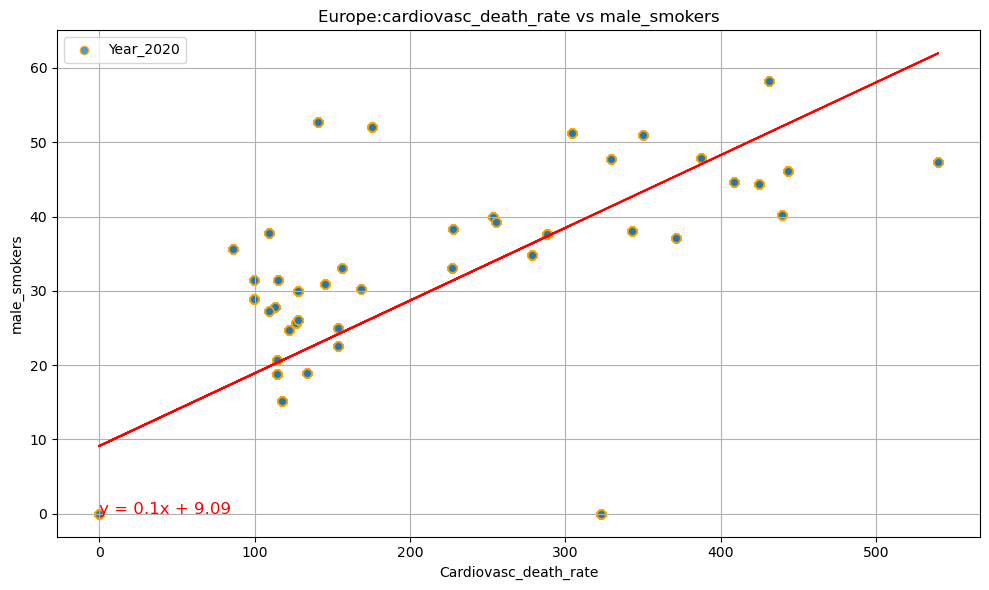

In [158]:
# Scatter Plot: Europe:cardiovasc_death_rate vs diabetes_prevalence

x_values = Reduced_Europe_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Europe_Comorbidity_df['male_smokers']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="Orange", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Europe:cardiovasc_death_rate vs male_smokers")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('male_smokers')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Europe_cardiovasc_death_rate vs male_smokers.png")

plt.show()

The r-value is: 0.5758945314739254
slope:0.032209251767862726
intercept:7.371360720491223
rvalue (Correlation coefficient):0.5758945314739254
stderr:0.00021533156967595016
y = 0.03x + 7.37


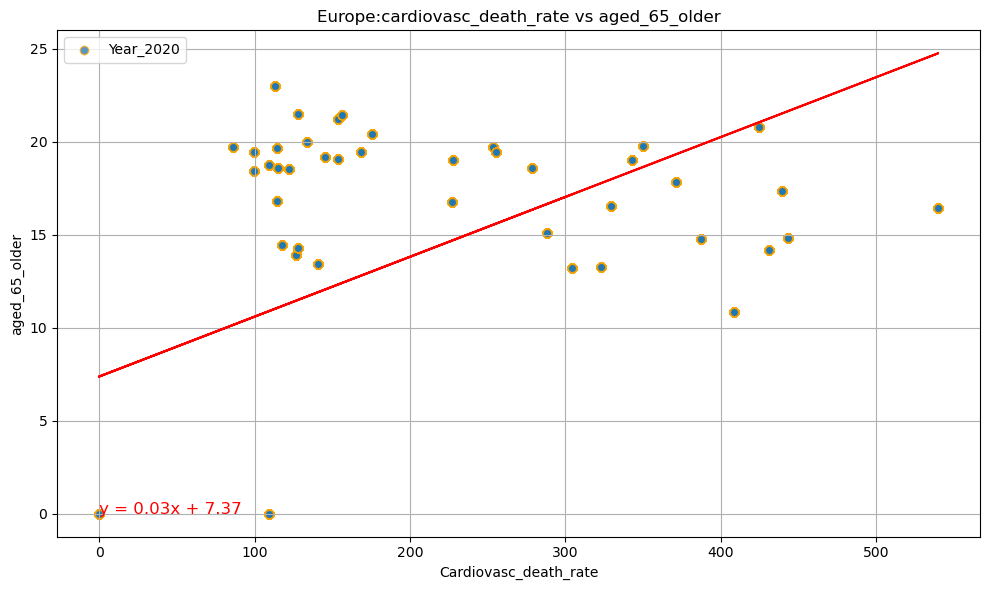

In [159]:
# Scatter Plot:Europe:cardiovasc_death_rate vs aged_65_older

x_values = Reduced_Europe_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Europe_Comorbidity_df['aged_65_older']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="Orange", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Europe:cardiovasc_death_rate vs aged_65_older")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('aged_65_older')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Europe_cardiovasc_death_rate vs age.png")

plt.show()

The r-value is: 0.5284872703802318
slope:0.04402804412312587
intercept:9.479605336152154
rvalue (Correlation coefficient):0.5284872703802318
stderr:0.0003330749723172391
y = 0.04x + 9.48


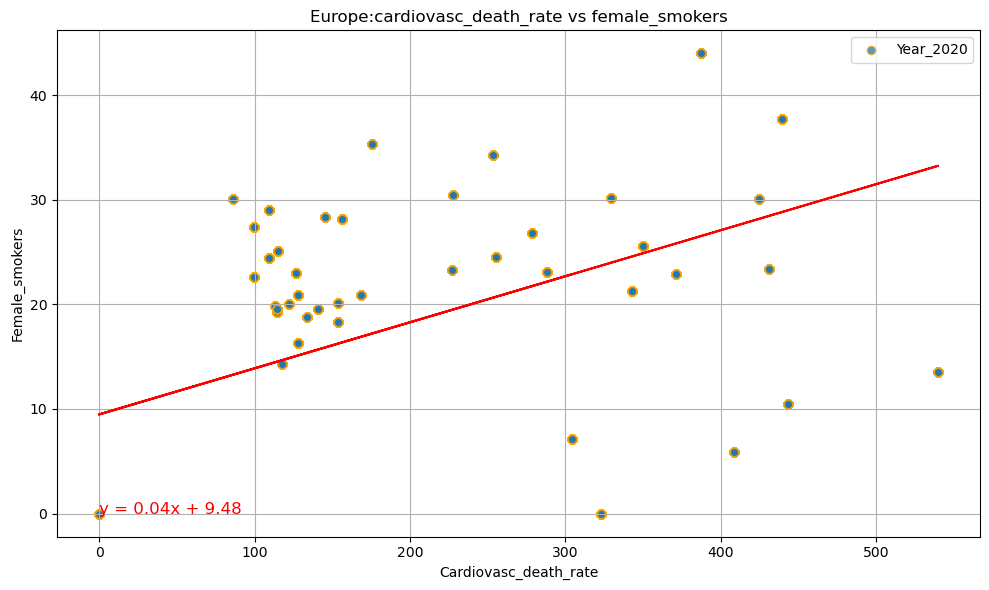

In [160]:
# Scatter Plot:Europe:cardiovasc_death_rate vs female_smokers

x_values = Reduced_Europe_Comorbidity_df['cardiovasc_death_rate']
y_values = Reduced_Europe_Comorbidity_df['female_smokers']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="Orange", linewidths=1, label="Year_2020")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Europe:cardiovasc_death_rate vs female_smokers")
print(f"The r-value is: {rvalue}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

plt.xlabel('Cardiovasc_death_rate')
plt.ylabel('Female_smokers')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/Apple/Desktop/COVID_19_Meenakshi/Resources/Europe_cardiovasc_death_rate vs female_smokers.png")

plt.show()